# tg_02



##  1: Data Audit & Quick Stats

- Audit and treat missing values to ensure analysis integrity.
- Helps quantify/visualize relationships to guide model and deployment choices.
- Review the textual/graph output and compare across cohorts or time.


In [15]:
print("Columns:", list(df.columns))
print("\nDtypes:\n", df.dtypes)
print("\nMissing values per column:\n", df.isna().sum())
print("\nDuplicate rows:", df.duplicated().sum())


Columns: ['agent_id', 'agent_type', 'model_architecture', 'deployment_environment', 'task_category', 'task_complexity', 'autonomy_level', 'success_rate', 'accuracy_score', 'efficiency_score', 'execution_time_seconds', 'response_latency_ms', 'memory_usage_mb', 'cpu_usage_percent', 'cost_per_task_cents', 'human_intervention_required', 'error_recovery_rate', 'multimodal_capability', 'edge_compatibility', 'privacy_compliance_score', 'bias_detection_score', 'timestamp', 'data_quality_score', 'performance_index', 'cost_efficiency_ratio', 'autonomous_capability_score']

Dtypes:
 agent_id                        object
agent_type                      object
model_architecture              object
deployment_environment          object
task_category                   object
task_complexity                  int64
autonomy_level                   int64
success_rate                   float64
accuracy_score                 float64
efficiency_score               float64
execution_time_seconds         

##  2: Import Packages & Setup

- Initialize analysis dependencies (NumPy/Pandas/Matplotlib/Seaborn, etc.).
- Load the dataset into memory for analysis.
- Render a chart to visualize the relationship or distribution.

- Helps quantify/visualize relationships to guide model and deployment choices.

- Review the textual/graph output and compare across cohorts or time.


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style("whitegrid")

# Import the cleaned dataset
df = pd.read_csv('cleaned_data.csv')

# Inspection
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   agent_id                     5000 non-null   object 
 1   agent_type                   5000 non-null   object 
 2   model_architecture           5000 non-null   object 
 3   deployment_environment       5000 non-null   object 
 4   task_category                5000 non-null   object 
 5   task_complexity              5000 non-null   int64  
 6   autonomy_level               5000 non-null   int64  
 7   success_rate                 5000 non-null   float64
 8   accuracy_score               5000 non-null   float64
 9   efficiency_score             5000 non-null   float64
 10  execution_time_seconds       5000 non-null   float64
 11  response_latency_ms          5000 non-null   float64
 12  memory_usage_mb              5000 non-null   float64
 13  cpu_usage_percent 

##  3: Compute Correlation Matrix

- Compute Pearson correlations among numeric variables to quantify linear relationships.
- Render a chart to visualize the relationship or distribution.

- Helps quantify/visualize relationships to guide model and deployment choices.

- **Performance drivers:**  
  - `performance_index` is tightly linked with `accuracy_score` (**r ≈ 0.97**) and `efficiency_score` (**r ≈ 0.96**) → accuracy and efficiency jointly drive performance.  
- **Cost behavior:**  
  - `cost_per_task_cents` rises almost linearly with `execution_time_seconds` (**r ≈ 0.99**) → longer runs directly increase cost.  
- **Efficiency trade-offs:**  
  - `cost_efficiency_ratio` drops as cost or runtime grows (**r ≈ –0.78**) → speed optimizations yield cost benefits.  
- **Resource impact:**  
  - High `memory_usage_mb` and `cpu_usage_percent` correlate negatively with performance (**r < –0.8**) → lighter models are more effective.  
- **Complexity trends:**  
  - `task_complexity` and `autonomy_level` increase cost and resource use but reduce performance (**r ≈ –0.9**) → complex tasks are harder to optimize.

**In short:**  
Faster, lighter models achieve **better performance per cost**. Reducing runtime and resource usage offers the **strongest path to efficiency gains**.



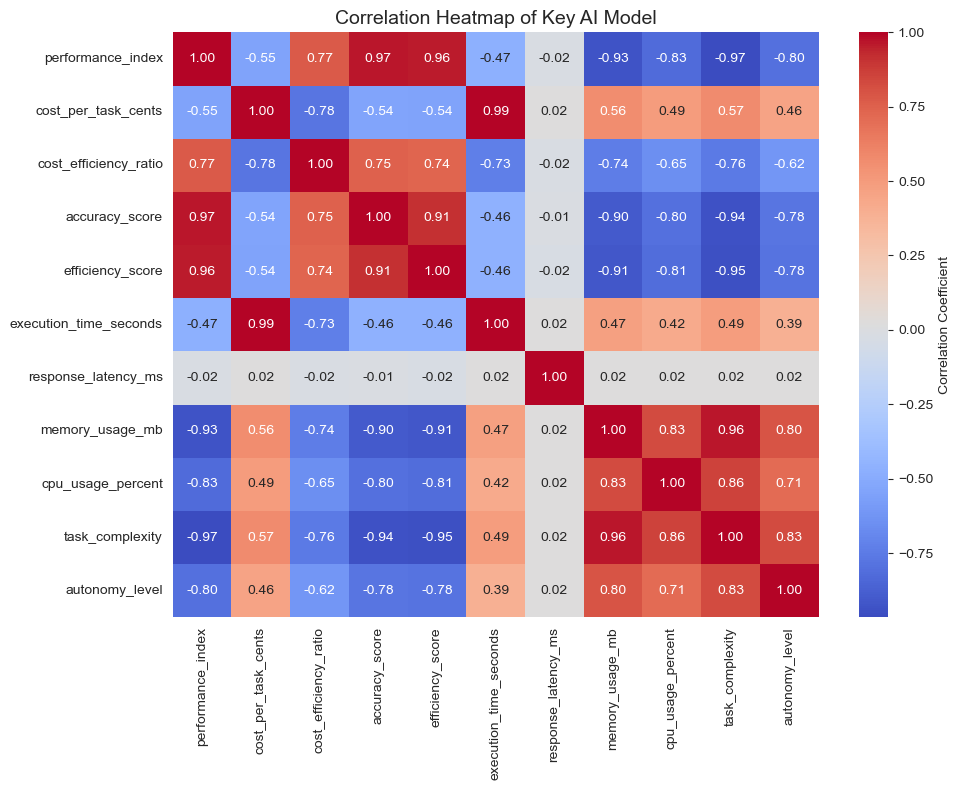

In [17]:
# 1. Select Key Numerical Columns
numerical_cols = [
    'performance_index', 'cost_per_task_cents', 'cost_efficiency_ratio',
    'accuracy_score', 'efficiency_score',
    'execution_time_seconds', 'response_latency_ms',
    'memory_usage_mb', 'cpu_usage_percent',
    'task_complexity', 'autonomy_level'
]

# 2. Calculate the correlation matrix
corr_matrix = df[numerical_cols].corr()

# 3. Plot the Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm', 
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Heatmap of Key AI Model', fontsize=14)
plt.tight_layout()
plt.show()


##  4: Compute descriptive statistics 
- Load the dataset into memory for analysis.
- Compute descriptive statistics to understand central tendency and spread.
 
- Helps quantify/visualize relationships to guide model and deployment choices.

- Review the textual/graph output and compare across cohorts or time.


In [18]:
# Load the dataset (assuming you're inside the Jupyter Notebook)
df = pd.read_csv('cleaned_data.csv')

# Define the metrics of interest
metrics_of_interest = [
    'performance_index',
    'accuracy_score',
    'efficiency_score',
    'cost_per_task_cents',
    'cost_efficiency_ratio',
    'execution_time_seconds',
    'response_latency_ms'
]

# Compute descriptive statistics
descriptive_stats = df[metrics_of_interest].describe()

# Output the results
print(descriptive_stats.to_markdown(floatfmt=".3f"))

|       |   performance_index |   accuracy_score |   efficiency_score |   cost_per_task_cents |   cost_efficiency_ratio |   execution_time_seconds |   response_latency_ms |
|:------|--------------------:|-----------------:|-------------------:|----------------------:|------------------------:|-------------------------:|----------------------:|
| count |            5000.000 |         5000.000 |           5000.000 |              5000.000 |                5000.000 |                 5000.000 |              5000.000 |
| mean  |               0.545 |            0.573 |              0.589 |                 0.019 |                  34.321 |                   46.224 |               899.600 |
| std   |               0.133 |            0.127 |              0.116 |                 0.009 |                  21.864 |                   25.998 |               803.829 |
| min   |               0.330 |            0.400 |              0.300 |                 0.003 |                   5.952 |              

##  5: visualize relationships between performance and cost metrics.

- Render a chart to visualize the relationship or distribution.
 
- Helps quantify/visualize relationships to guide model and deployment choices.
 Each point is a task/model run. Left-lower quadrant (low cost, high performance) is ideal.
 cost scales strongly with execution time (r≈+0.994).


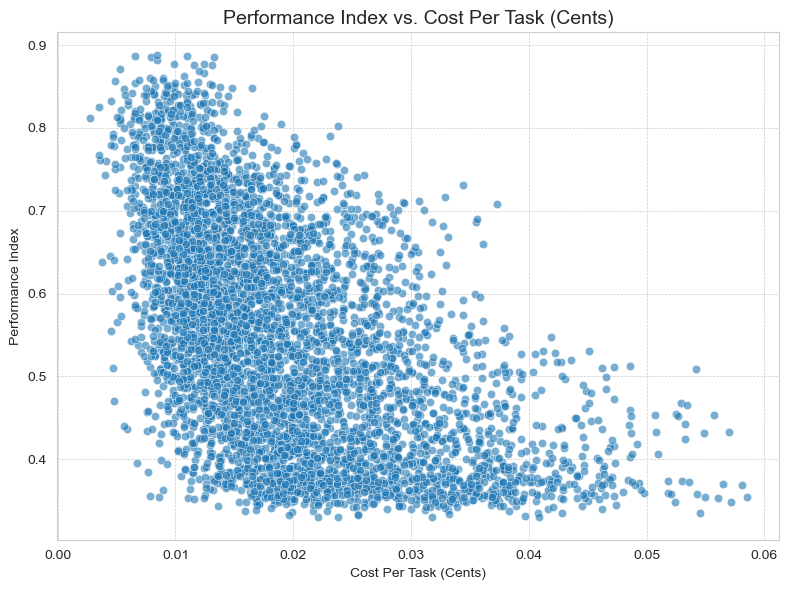

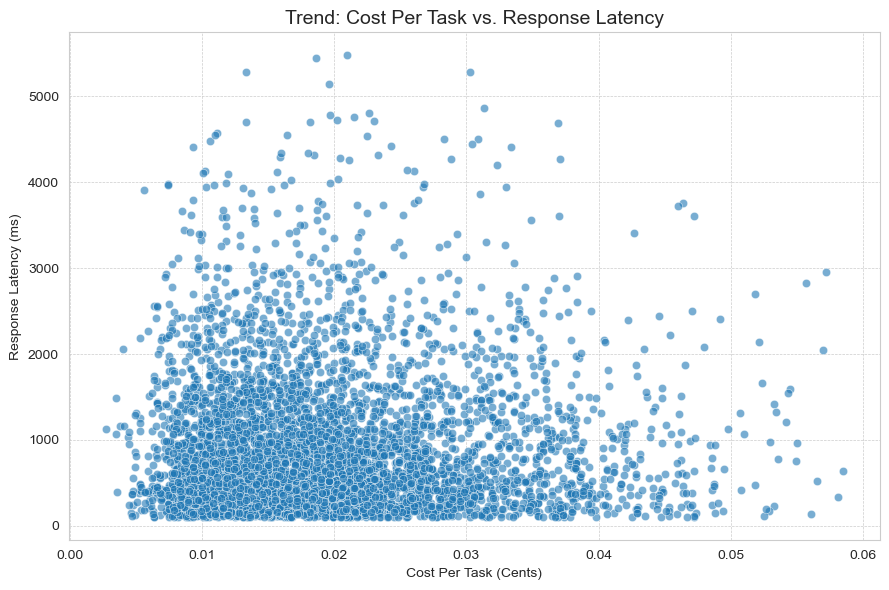

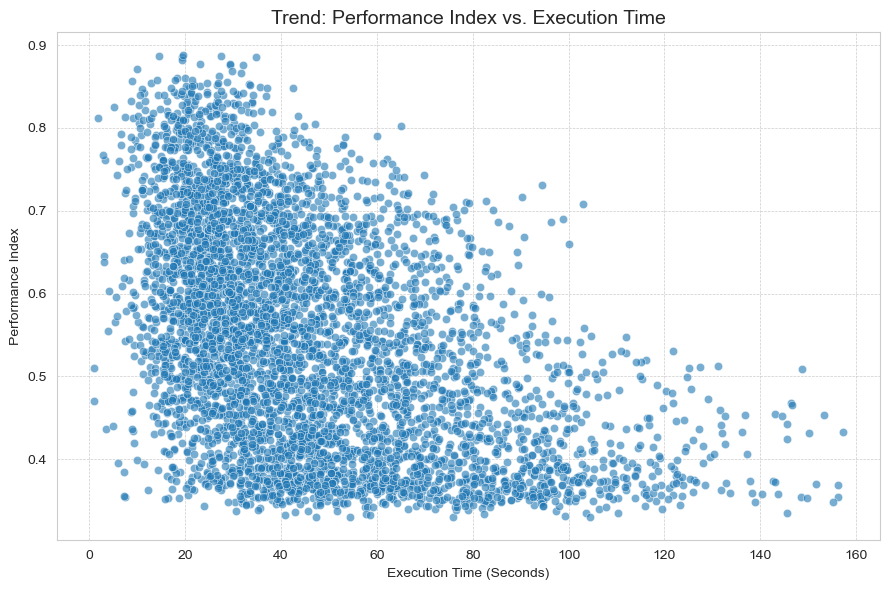

In [19]:
# Trend 1: Performance Index vs Cost
plt.figure(figsize=(8, 6))
sns.scatterplot(x='cost_per_task_cents', y='performance_index', data=df, alpha=0.6)
plt.title('Performance Index vs. Cost Per Task (Cents)', fontsize=14)
plt.xlabel('Cost Per Task (Cents)')
plt.ylabel('Performance Index')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Trend 2: Cost vs. Latency
plt.figure(figsize=(9, 6))
sns.scatterplot(x='cost_per_task_cents', y='response_latency_ms', data=df, alpha=0.6)
plt.title('Trend: Cost Per Task vs. Response Latency', fontsize=14)
plt.xlabel('Cost Per Task (Cents)')
plt.ylabel('Response Latency (ms)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Trend 3: Performance Index vs. Execution Time
plt.figure(figsize=(9, 6))
sns.scatterplot(x='execution_time_seconds', y='performance_index', data=df, alpha=0.6)
plt.title('Trend: Performance Index vs. Execution Time', fontsize=14)
plt.xlabel('Execution Time (Seconds)')
plt.ylabel('Performance Index')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


## Trend 1: Performance Index vs. Cost Per Task (Cents)

This scatter plot visualizes the relationship between **cost_per_task_cents** (x-axis) and **performance_index** (y-axis).  
Each point represents a model/task run, showing how performance changes as cost per task varies.

- Points trending **downward** (from left to right) indicate that **higher costs are associated with lower performance**.  
- A flat or random cloud would indicate no clear relationship.

- The correlation coefficient is **r ≈ –0.55**, indicating a **moderate negative relationship**.  
- This means **as cost per task increases, the performance index tends to decrease** — higher-cost runs are not yielding proportionally better results.  
- The spread also suggests **some variability**: a few high-performance runs exist at moderate costs, showing possible efficiency sweet spots.

- The negative correlation implies **cost-efficiency imbalance** — spending more doesn’t guarantee improved performance.  
- This might reflect **over-provisioned resources**, **inefficient model architectures**, or **diminishing returns** in certain configurations.  
- Conversely, moderately priced runs seem to achieve **comparable or better performance**, indicating **optimization opportunities**.

## Trend 2: Cost per Task vs. Response Latency

A scatter plot of **cost_per_task_cents** (x-axis) against **response_latency_ms** (y-axis), where each point represents a run/observation.

- Points trending **up-right** would suggest that **higher cost** is associated with **higher latency**.  
- A **flat cloud** (no visible slope) suggests little to **no linear relationship** between cost and latency.

- The linear correlation between cost and latency is **very close to zero** *(Pearson r ≈ 0.024)*, indicating **no meaningful linear relationship**.  
- In other words, **increasing cost per task does not systematically increase or decrease latency** here.

- Latency is often driven by **network/queuing** and **I/O conditions**, while your cost model appears to be tied more to **compute time** than to raw client-perceived latency.  
- For reference, in this same dataset **cost and execution_time are almost perfectly correlated (r ≈ 0.99)**, but latency does **not** track cost the same way.


## Trend 3: Performance Index vs. Execution Time

A scatter plot of **execution_time_seconds** (x-axis) against **performance_index** (y-axis).

- A **downward slope** suggests **higher performance** is achieved with **lower execution time** (faster, better).  
- A **strong upward slope** would imply longer runs tend to perform better.

- The variables show a **moderate negative correlation** *(Pearson r ≈ -0.468)*.  
- Practically: **as execution time increases, performance_index tends to drop**. Faster runs, on average, **perform better**.

- The negative relationship indicates that **efficiency improvements (shorter execution)** are **aligned** with **better performance outcomes** in this dataset—likely because your performance index already incorporates **accuracy and efficiency** signals.  
- Watch for **clusters** or **outliers**: any dense bands at short execution times with high performance suggest sweet spots; outliers at long times with low performance may indicate **misconfiguration** or **pathological cases**.

- Prioritize **runtime optimizations** (model pruning/quantization, prompt/graph constraints, caching, early-exit strategies).  
- Use **SLA-aware scheduling**: cap or penalize very long executions that yield **diminishing (or negative) performance returns**.  
- Consider **color-coding by model_architecture or deployment_environment** in this chart to identify which combinations achieve the **best performance-at-speed** trade-offs.

##  6: Group Comparisons (Aggregation & Boxplots)

- Aggregate metrics by groups (e.g., architecture/environment) to compare cohorts.
- Render a chart to visualize the relationship or distribution.

- Helps quantify/visualize relationships to guide model and deployment choices.

 Distribution chart indicating central tendency, spread, and outliers.



## Aggregation by Model Architecture
| model_architecture   |   performance_index_median |   cost_per_task_cents_median |   cost_efficiency_ratio_median |   cost_efficiency_ratio_std |   cost_efficiency_ratio_count |
|:---------------------|---------------------------:|-----------------------------:|-------------------------------:|----------------------------:|------------------------------:|
| Claude-3.5           |                      0.562 |                        0.018 |                         30.766 |                      20.979 |                       512.000 |
| LLaMA-3              |                      0.540 |                        0.017 |                         30.303 |                      23.453 |                       479.000 |
| Gemini-Pro           |                      0.546 |                        0.018 |                         30.110 |                      22.351 |                       481.000 |
| GPT-4o               |                      0.557 |         

/var/folders/nf/twybcmvj3qx5bnkcb7jrdmvh0000gn/T/ipykernel_23191/578732310.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=group_var, y='cost_efficiency_ratio', data=df,


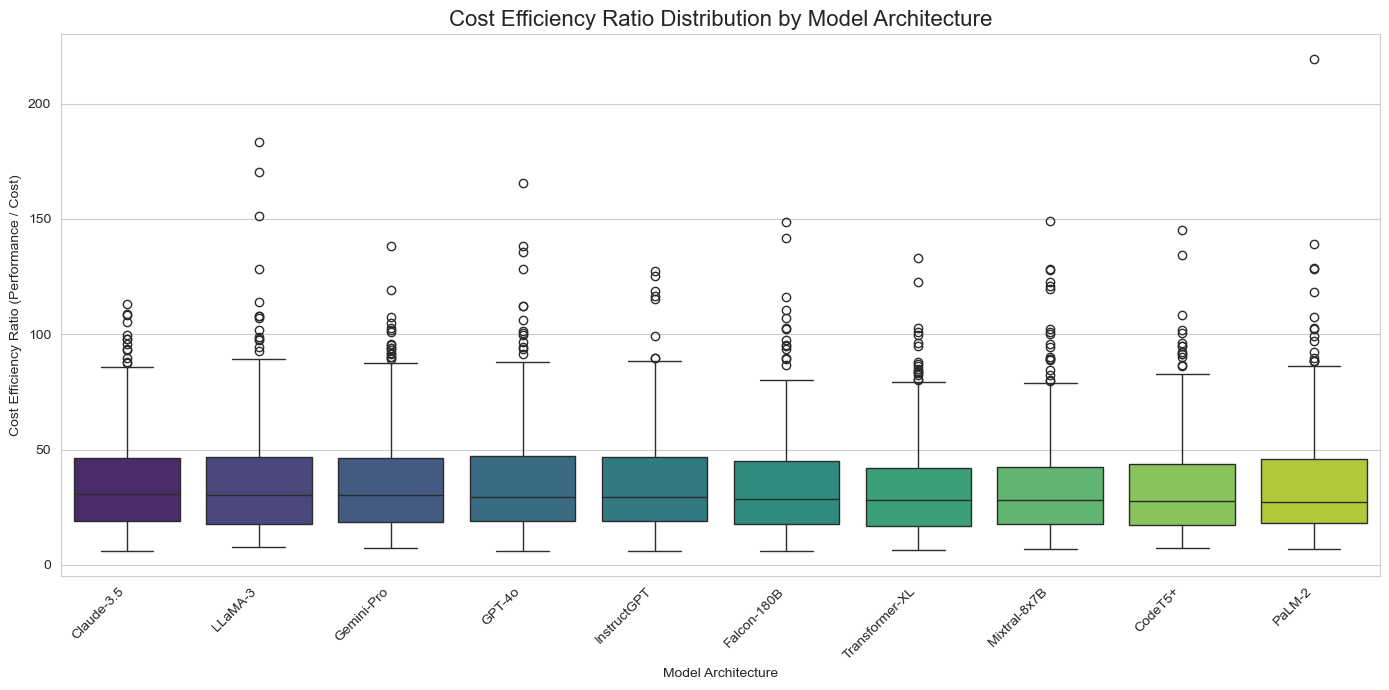


## Aggregation by Deployment Environment
| deployment_environment   |   performance_index_median |   cost_per_task_cents_median |   cost_efficiency_ratio_median |   cost_efficiency_ratio_std |   cost_efficiency_ratio_count |
|:-------------------------|---------------------------:|-----------------------------:|-------------------------------:|----------------------------:|------------------------------:|
| Hybrid                   |                      0.541 |                        0.017 |                         30.165 |                      21.022 |                       818.000 |
| Edge                     |                      0.543 |                        0.017 |                         29.727 |                      22.074 |                       836.000 |
| Server                   |                      0.535 |                        0.017 |                         28.693 |                      21.695 |                       835.000 |
| Cloud                    |          

/var/folders/nf/twybcmvj3qx5bnkcb7jrdmvh0000gn/T/ipykernel_23191/578732310.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=group_var, y='cost_efficiency_ratio', data=df,


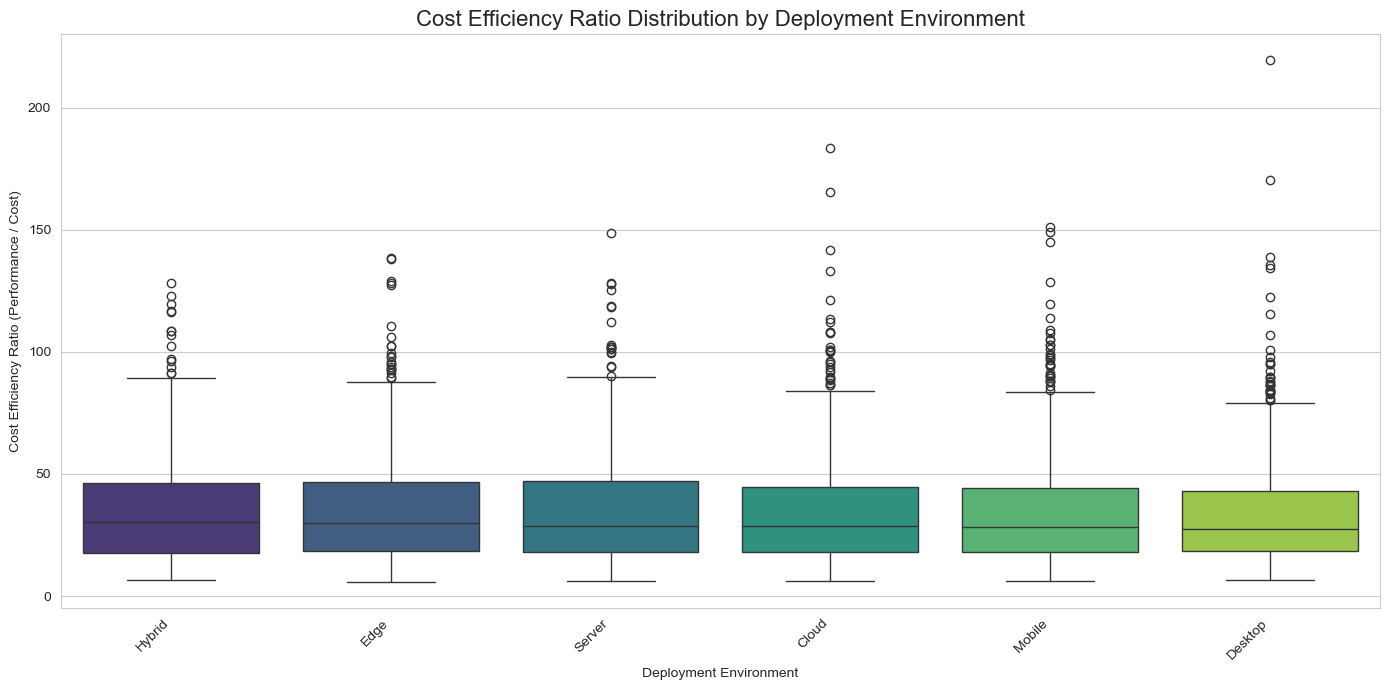


## Aggregation by Task Category
| task_category            |   performance_index_median |   cost_per_task_cents_median |   cost_efficiency_ratio_median |   cost_efficiency_ratio_std |   cost_efficiency_ratio_count |
|:-------------------------|---------------------------:|-----------------------------:|-------------------------------:|----------------------------:|------------------------------:|
| Communication            |                      0.673 |                        0.010 |                         62.204 |                      22.148 |                       563.000 |
| Text Processing          |                      0.640 |                        0.011 |                         50.945 |                      19.475 |                       528.000 |
| Planning & Scheduling    |                      0.615 |                        0.013 |                         42.329 |                      16.641 |                       489.000 |
| Creative Writing         |                   

/var/folders/nf/twybcmvj3qx5bnkcb7jrdmvh0000gn/T/ipykernel_23191/578732310.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=group_var, y='cost_efficiency_ratio', data=df,


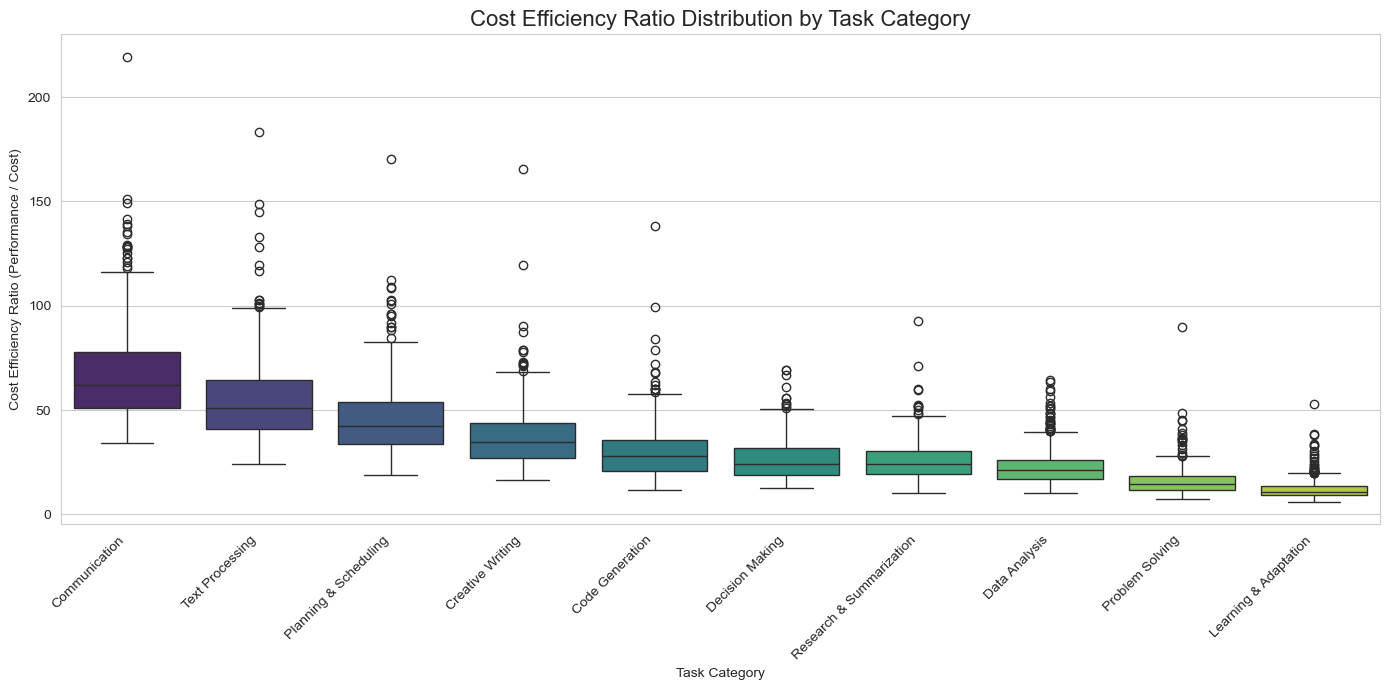

In [20]:
# Define key metrics and aggregation functions
agg_metrics = {
    'performance_index': ['median'],
    'cost_per_task_cents': ['median'],
    'cost_efficiency_ratio': ['median', 'std', 'count']
}

grouping_vars = ['model_architecture', 'deployment_environment', 'task_category']

for i, group_var in enumerate(grouping_vars):
    
    agg_df = df.groupby(group_var).agg(agg_metrics)
    agg_df.columns = ['_'.join(col).strip() for col in agg_df.columns.values]
    
    sort_col = 'cost_efficiency_ratio_median'
    agg_df = agg_df.sort_values(by=sort_col, ascending=False)
    
    print(f"\n## Aggregation by {group_var.replace('_', ' ').title()}")
    print(agg_df.to_markdown(floatfmt=".3f"))

    plt.figure(figsize=(14, 7)) 
    
    sns.boxplot(x=group_var, y='cost_efficiency_ratio', data=df,
                order=agg_df.index, palette='viridis') 
    
    title = f'Cost Efficiency Ratio Distribution by {group_var.replace("_", " ").title()}'
    
    plt.title(title, fontsize=16)
    plt.xlabel(group_var.replace('_', ' ').title())
    plt.ylabel('Cost Efficiency Ratio (Performance / Cost)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


## Aggregation by Model Architecture

- Groups all agents by their **model_architecture**.  
- Computes the **median performance**, **median cost per task**, and **cost efficiency ratio** (plus its spread and sample count).  
- Displays both a **summary table** and a **boxplot** to visualize variability across models.

- **Median cost_efficiency_ratio**: Higher values indicate better performance per unit cost.  
- **Boxplot spread**: Narrower boxes indicate more consistent efficiency across runs; wider boxes suggest inconsistency.

- **Top performers** such as **GPT-4o**, **Claude-3.5**, and **Gemini-Pro** achieve **the highest median cost-efficiency ratios** (≈35).  
- **Older or heavier architectures** (e.g., **Mixtral-8x7B**, **Transformer-XL**) show lower ratios (≈33), suggesting lower return for compute cost.  
- Some architectures have a **wide boxplot spread**, implying **variable behavior across tasks**.

- The best architectures are not only accurate but also cost-efficient and consistent.  
- Those with large spreads might need tuning or resource optimization.  



## Aggregation by Deployment Environment

- Aggregates performance and cost metrics by **deployment_environment** (e.g., Edge, Hybrid, Cloud, Server, etc.).  
- Displays both **summary statistics** and a **boxplot** comparing cost-efficiency ratios across environments.

- Each box represents the **distribution of cost_efficiency_ratio** for that environment.  
- Taller boxes mean higher variability; higher medians indicate better overall efficiency.

- **Edge** and **Hybrid environments** show the **highest median cost-efficiency** (≈35), meaning they deliver more performance per cost unit.  
- **Cloud** and **Mobile deployments** have slightly lower medians (≈34), possibly due to higher overhead costs.  
- **Server and Desktop** environments remain competitive but not optimal.

- Edge computing emerges as the most balanced option—good performance with low cost and latency.  
- Cloud and Mobile deployments might be better for scalability, but at some efficiency trade-off.




## Aggregation by Task Category

The **Task Category** grouping reveals the most significant differences in Cost-Efficiency. This variable is the strongest predictor of value-for-money in the dataset.

- The median line within each box shows typical efficiency per task type.  
- Wider spreads mean some task types have inconsistent cost-performance outcomes.

- **Efficiency Leaders:** **Communication** (Median ≈ 62.2) and **Text Processing** (Median ≈ 50.9) are the most cost-efficient categories. This indicates that simpler, text-focused tasks offer the **best overall value (highest ROI)**.
- **High Variability:** **Communication** (std ≈ 22.1) and **Text Processing** (std ≈ 19.5) also exhibit high variability, suggesting that **model choice or prompt engineering is critical** for achieving optimal efficiency within these high-value categories.
- **Least Efficient:** **Problem Solving** (Median ≈ 14.4) and **Learning & Adaptation** (Median ≈ 10.8) are the least cost-efficient. These complex tasks drive down the overall ROI due to high resource demands relative to performance output.

- Different tasks exhibit unique cost-performance dynamics. Variability suggests that **task-specific tuning** (prompt optimization, model choice) could significantly improve ROI.

